
##                                                                           WEEK 4



                                                                           Chris Dhamala
                                                                    PRG 330: Python Programming
                                                                        Prof. TekRaj Pant
                                                                 Westcliff University, California
                                                                            November 17,2024
                                                                 

## Data Transformation and Mapping
- apply: allows us to apply a function to each element, row, or column in a DataFrame or Series
- map: is used to map values in a Series according to a dictionary or another Series
- replace: replace allows for replacing specific values in the DataFrame with new value
- astype: this is used to convert data type
- pipe: it allows chaining and using complex functions that operate on the entire DataFrame. This can be used for complex transformation operation 


In [14]:
#convert marks to scale of 1

import pandas as pd
student = pd.read_csv('data/student.csv')
student['mark_percent'] = student ["mark"].apply(lambda m: m /100)
student.head()

,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,75,female,0.75
1,2,Max Ruin,Three,85,male,0.85
2,3,Arnold,Three,55,male,0.55
3,4,Krish Star,Four,60,female,0.60
4,5,John Mike,Four,60,female,0.60


In [15]:
student['grade']= student['class'].map({'one':1,'Two':2, 'Three':3, 'Four':4, 'five':5, 'six' :6, 'seven':7, 'eight':8, 'Nine':9, 'Ten':10})
student['gender_code']= student['gender'].map({'male':1, 'female':2})
student.head()



,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75,female,0.75,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,Four,60,female,0.60,4.0,2
4,5,John Mike,Four,60,female,0.60,4.0,2


In [16]:
#replace specific calues in the 'class' column
student['class']= student['class'].replace({'four': '4th', 'ten': '10th'})
# replace name 'john doe' with 'jairam' (replace specific value)
student['name']= student['name'].replace({'john deo':'jairam'})
student.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75,female,0.75,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,Four,60,female,0.60,4.0,2
4,5,John Mike,Four,60,female,0.60,4.0,2


In [17]:
#convert 'grade column to int
student['mark'] = student['mark'].astype(float)
student.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75.0,female,0.75,4.0,2
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1
2,3,Arnold,Three,55.0,male,0.55,3.0,1
3,4,Krish Star,Four,60.0,female,0.60,4.0,2
4,5,John Mike,Four,60.0,female,0.60,4.0,2


In [18]:
def check_result(df):
  df['result']=df['mark'].apply(lambda m : 'pass' if m>40 else 'fail')
  return df

student = student.pipe(check_result)
student.head()
                                

,id,name,class,mark,gender,mark_percent,grade,gender_code,result
0,1,John Deo,Four,75.0,female,0.75,4.0,2,pass
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1,pass
2,3,Arnold,Three,55.0,male,0.55,3.0,1,pass
3,4,Krish Star,Four,60.0,female,0.60,4.0,2,pass
4,5,John Mike,Four,60.0,female,0.60,4.0,2,pass


## Data Cleaning
- Handel missing data
- handle Duplicates
- One - Hot - Encoding
- Normalization

### Handle missing data

- Remove rows conataining missing values ``(df.dropna)``
    - ``dropna(axis = 0)`` removes rows conataining at least one missing values
    - ``(dropna(axis = 1))`` Removes the column containing at least one missing values

- Replace missing values `` (df.fillna())``
    - **Replace with specific values:** ``(df.fillna(value))``
    - **backward fill, forward fill :** ``(df.fillna(value, method = 'bfill'))``
        ``(df.fillna(value, method.'ffill))``
    - **fill individual column with specified value:** ``(df.fillna({'heoght:150,'weight': 60}))``
    ### Axis 1 is columns and Axis 0 is the row. In big datas we drop the row and in small dataset we fill the data.
    - **fill with average, interpolarion etc...** 

In [19]:
from IPython.display import display

student=pd.read_csv('data/student.csv')
display(student.head())
student.dropna(axis=0, how='any', inplace=True) #(axis=0 deafult) drop rows with

student=student.fillna(1) #replace missing values with 1
display(student.head())

student.fillna(method='ffill')#fill with previous row value
student.fillna(method='bfill')#fill with next row
student['mark'].fillna(50) 
student.fillna({'mark': 50, 'gender':'male'})
df_interpolated= student.interpolate()
student.fillna(df_interpolated)
student['mark'].fillna(student['mark'].mean())


,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


C:\Users\nepal\AppData\Local\Temp\ipykernel_5876\2760651542.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  student.fillna(method='ffill')#fill with previous row value
C:\Users\nepal\AppData\Local\Temp\ipykernel_5876\2760651542.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  student.fillna(method='bfill')#fill with next row
C:\Users\nepal\AppData\Local\Temp\ipykernel_5876\2760651542.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated= student.interpolate()


0     75
1     85
2     55
3     60
4     60
5     55
6     78
7     85
8     78
9     55
10    89
11    94
12    88
13    88
14    88
15    88
16    54
17    75
18    18
19    65
20    69
21    55
22    79
23    78
24    88
25    79
26    81
27    86
28    55
29    79
30    88
31    90
32    96
33    69
34    88
Name: mark, dtype: int64

In [21]:
duplicate= student.duplicated()
student.drop_duplicates()
duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [22]:
df = pd.read_csv('data/student.csv')
df_panda_encoded = pd.get_dummies(df,columns=['class'])
display(df_panda_encoded)

,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,75,female,False,False,False,True,False,False,False,False
1,2,Max Ruin,85,male,False,False,False,False,False,False,False,True
2,3,Arnold,55,male,False,False,False,False,False,False,False,True
3,4,Krish Star,60,female,False,False,False,True,False,False,False,False
4,5,John Mike,60,female,False,False,False,True,False,False,False,False
5,6,Alex John,55,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78,male,False,True,False,False,False,False,False,False
7,8,Asruid,85,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78,male,False,False,False,False,False,False,True,False
9,10,Big John,55,female,False,False,False,True,False,False,False,False


## Data Normalization
### Data normalization involves adjusting the measurement values of different scales to a common scale. normalixation is only applicable to numerical comlumns
#### We will be looking over only 5 normalization methods
- Single feature scaling
- Min-max-scaline
- Z- score normalization
- Log scaling
- Clipping


In [23]:
import numpy as np
products = pd.read_csv('Data/product-data.csv')
# single feature Scaling
products['Sales_Single_Scale']= products['Sales']/products['Sales'].max()

#log
products['Sales_Log_Scale']= np.log1p(products['Sales'])

#clipping
products['Discount_Clipped']= products['Discount_Percentage'].clip(lower=5,upper=15)

products.head()


,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.5,6.216606,10
1,2,700,450,3.9,15,0.7,6.552508,15
2,3,800,300,4.5,12,0.8,6.685861,12
3,4,900,350,4.8,8,0.9,6.803505,8
4,5,1000,500,4.0,5,1.0,6.908755,5


## Grouping and Aggregration

- Grouping consist of three operations
    - Split
    - Apply
    - Combine

In [18]:
import numpy as np
import pandas as pd
from IPython.display import display
students = pd.read_csv ('data/CSV data.CSV')
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()


,id,name,class,mark
gender,,,,
female,17,17,17,17
male,18,18,18,18


gender
female    77.529412
male      71.944444
Name: mark, dtype: float64

In [19]:
import numpy as np
import pandas as pd
from IPython.display import display
students = pd.read_csv ('data/CSV data.CSV')
gender_data = students.groupby('class')
display(gender_data.count())
gender_data['mark'].mean()


,id,name,mark,gender
class,,,,
Eight,1,1,1,1
Fifth,1,1,1,1
Five,2,2,2,2
Four,9,9,9,9
Nine,2,2,2,2
Seven,10,10,10,10
Six,7,7,7,7
Three,3,3,3,3


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.888889
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: mark, dtype: float64

# Sorting

## Sotring BY Value

- Ascending
-  Descending
- Sorting by Date
- Sorting by key Fucntion


## Sorting by using Ascending and Descending Order

In [27]:
students = pd.read_csv('data/CSV data.CSV')
display(students.head())
New_sorted_data = students.sort_values(by = ['name', 'mark'], ascending= True)
display(New_sorted_data.head())

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


,id,name,class,mark,gender
5,6,Alex John,Four,55,male
2,3,Arnold,Three,55,male
7,8,Asruid,Five,85,male
20,21,Babby John,Four,69,female
9,10,Big John,Four,55,female


## Sort by using date

In [30]:
data = pd.read_csv('data/student-admission.csv')
# frist we have to convert it into datetime

data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])
# Now we are sorting using the Admissiondate
sorted_data = data.sort_values(by= ['AdmissionDate', 'Name'], ascending= True)
sorted_data


,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
5,5,2021-01-17,1,Abhinav,IT
3,3,2021-01-18,2,Sohan,Mechanical
2,2,2021-01-20,3,Mohan,Civil
6,6,2021-01-21,4,Danny,EEE
4,4,2021-01-22,6,Lucky,CSE
1,1,2021-01-22,5,Shyam,ECE
0,0,2021-01-25,7,Ram,CSE


# Python Data Visualization using Matplotlib and Seaborn

## Types of graphs and cisualixation tools 

## Category 
- Comparision = Bar graph, Line Graph, Multiple Line chart, Gantt chart, Radat chart
- Distribution = Histogram, Box plot, Violin plot, Violin plot, Frequency polygon, Stem and leaf plot, Cumulative frequency distribution
- Compositions = pie chart, Doughnhut chart, stacked car graph, stacked area chart, funnel chart

## Data Comparision and Visualization
- Bar Graph
- Line Graph
- Multiple line graph

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Compare the GDP gorwth of Nepal, India, and China

- Bar graph
- Line Graph

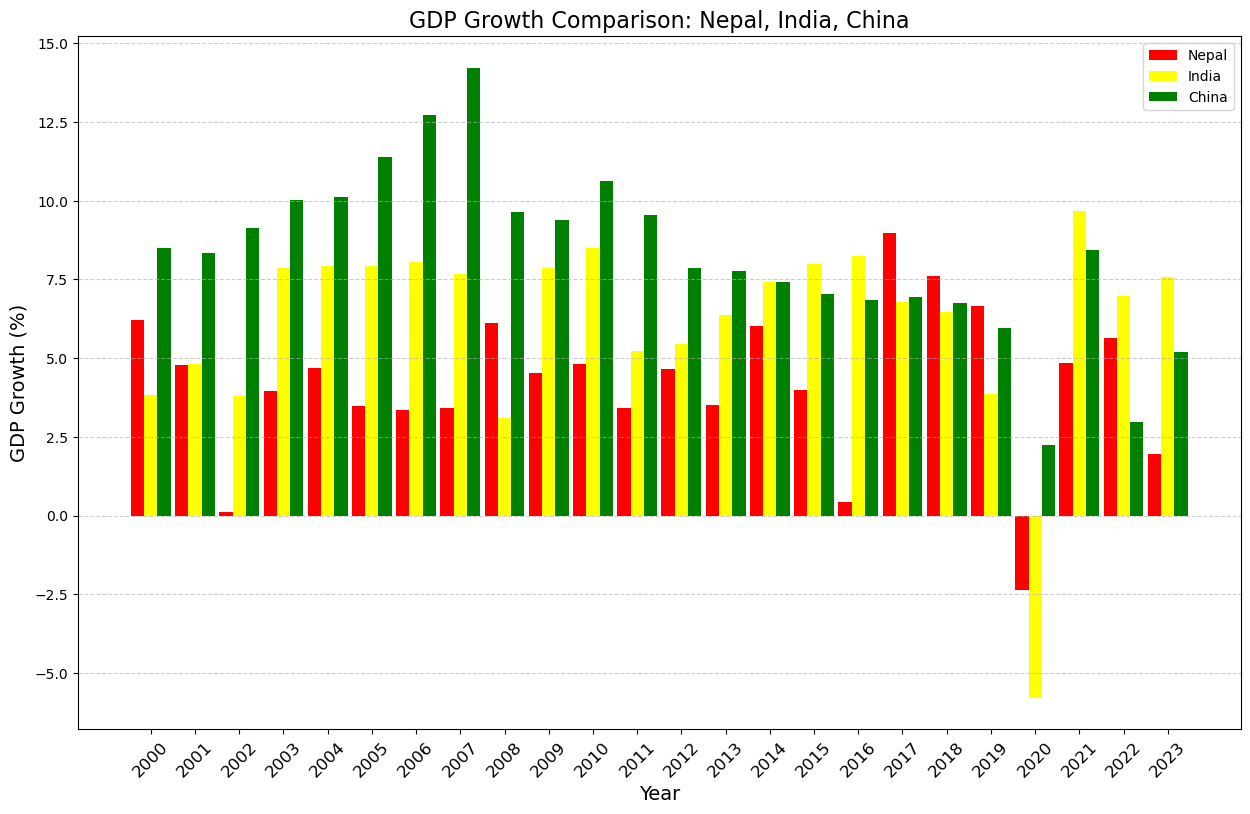

In [7]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

# Set up the figure size
plt.figure(figsize=(15,9))

# Define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

# PLotting the bars for Nepal India and China
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label='Nepal', color= 'red')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India', color= 'Yellow')
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color ='Green')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12,rotation=45)
plt.legend()
# Adding grid lines for better readability
plt.grid(axis= 'y', linestyle='--', alpha=0.6)

## Analytics representation using seaborn and Matplot library

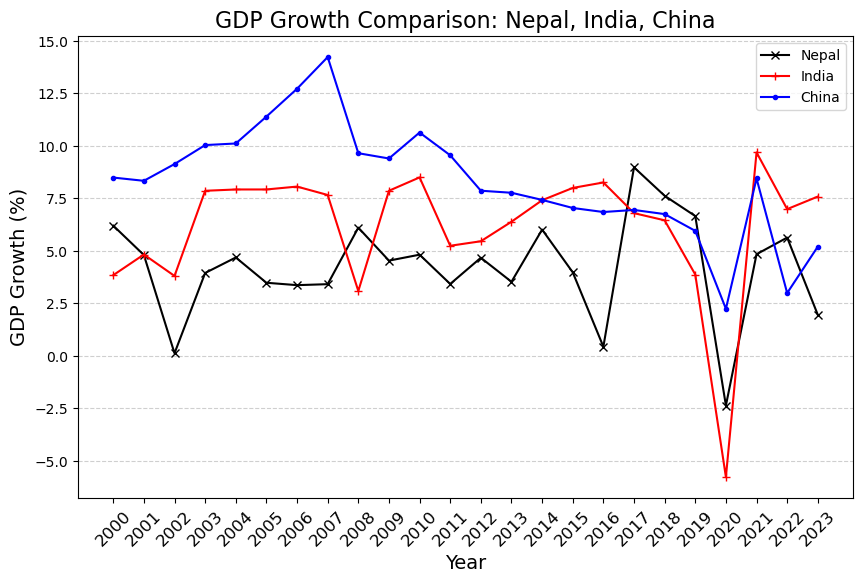

In [5]:
nep_ind_china_gdp_data = pd.read_csv('Data/nep-india-china-gdp.csv')

years = nep_ind_china_gdp_data['Year']
nepal_gdp = nep_ind_china_gdp_data['Nepal']
india_gdp = nep_ind_china_gdp_data['India']
china_gdp = nep_ind_china_gdp_data['China']

plt.figure(figsize=(10,6))
plt.plot(years, nepal_gdp, label='Nepal', color='black', marker='x')
plt.plot(years, india_gdp, label='India', color='red', marker='+')
plt.plot(years, china_gdp, label='China', color='blue', marker='.')

# Adding title and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45)
plt.legend()

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

## Visualize Relationship Between Data

• Scatter Plot: A scatter plot identifies a possible relationship between changes observed in two different sets of variables

• Bubble Chart: A bubble chart can be used to represent the relationship between x (age), (income), and bubble size (expense)

• Heat Map: Heat maps are graphical representations of data that use colors to show the intensity of a variable or a relationship

• Density Plot: A Density Plot visualises the distribution of data over a continuous interval or time period

• Correlation Matrix: A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


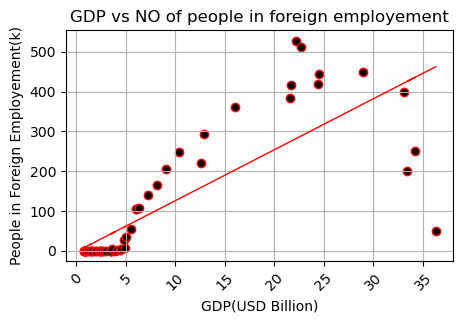

In [8]:
from IPython.display import display
import numpy as np
# scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment']=nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n:n/1000)
display(nepal_economy.head())
plt.figure(figsize=(5,3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color="black",
    edgecolor="red"
)
# fit a linear regression model
x=nepal_economy['GDP']
y=nepal_economy['no_of_people_in_foreign_employment']
m,c=np.polyfit(x,y,1)
#plot the trend line
plt.plot(x,m*x+c, color='red', linewidth=1, label="GDP-FE-Trend-Line")
# add titles and labels
plt.xticks(rotation=45)
plt.title('GDP vs NO of people in foreign employement')
plt.xlabel('GDP(USD Billion)')
plt.ylabel('People in Foreign Employement(k)')
plt.grid(True)
# Display
plt.show()

## Bubble Map

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


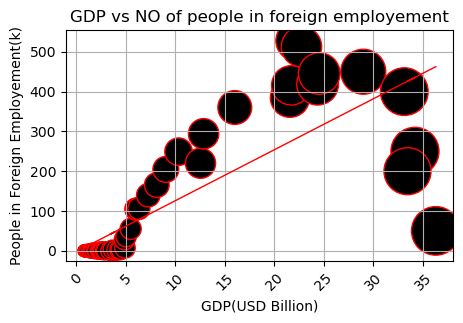

In [10]:
from IPython.display import display
import numpy as np
# scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment']=nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n:n/1000)
display(nepal_economy.head())
plt.figure(figsize=(5,3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color="black",
    edgecolor="red",
    s=nepal_economy['per_capita']
)
# fit a linear regression model
x=nepal_economy['GDP']
y=nepal_economy['no_of_people_in_foreign_employment']
m,c=np.polyfit(x,y,1)
#plot the trend line
plt.plot(x,m*x+c, color='red', linewidth=1, label="GDP-FE-Trend-Line")
# add titles and labels
plt.xticks(rotation=45)
plt.title('GDP vs NO of people in foreign employement')
plt.xlabel('GDP(USD Billion)')
plt.ylabel('People in Foreign Employement(k)')
plt.grid(True)
# Display
plt.show()

## Heat Map

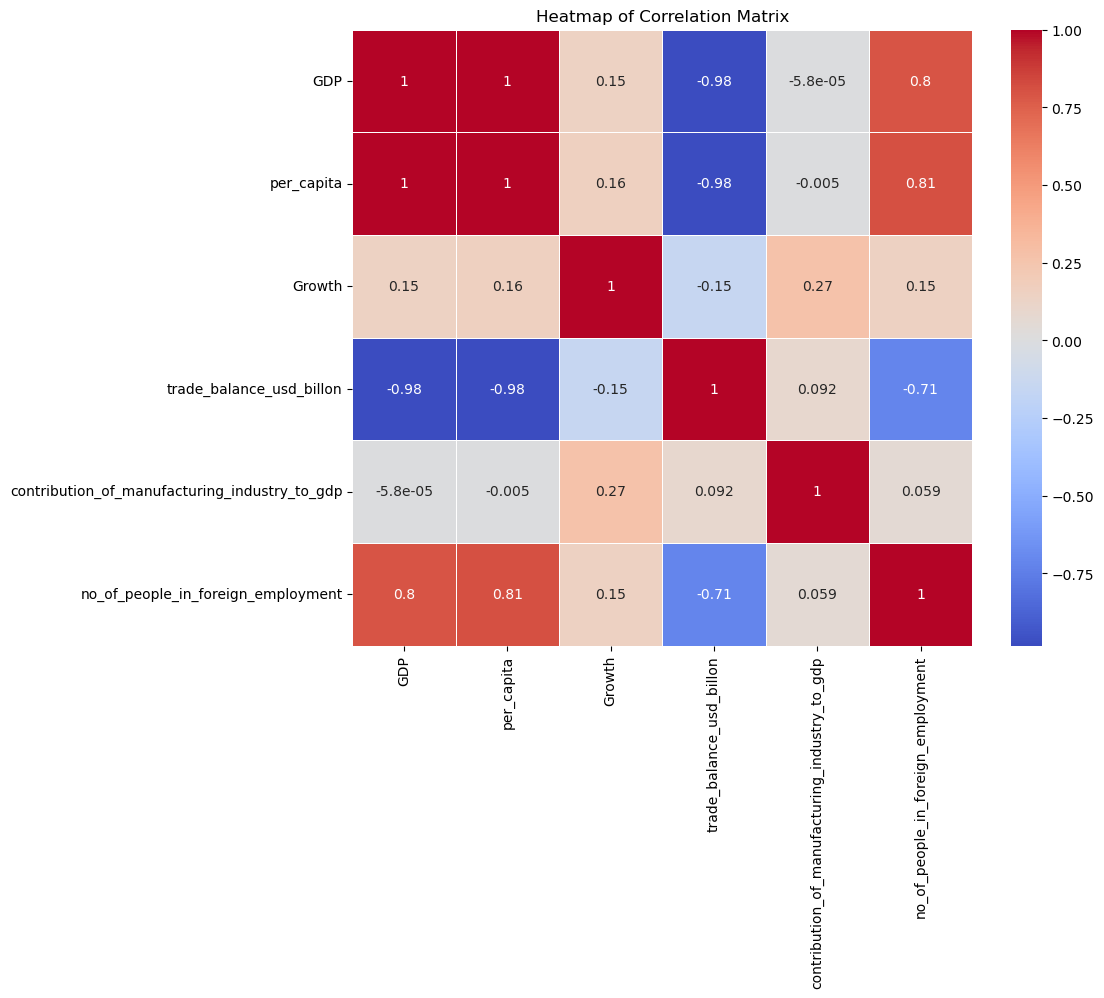

In [12]:
plt.figure(figsize= (10,8))
correlation_matrix = nepal_economy.drop(columns=['Year'], inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Distributions
• Histogram: Histogram is used to describe numecical data which have grouped into frequency distribution.

• Frequency Polygon: Frequency Polygon can be constructed simply by joining the upper mid point of histogram.

• Cumulative Frequency Distribution (ogive): Cumulative frequency distrition facilitages to see how may observations lie above or below certain values and is also graphicial presentation of frequency distribution.

• Box Plot: It shows the Five Point summary (Min,Q1, Median, Q3, Max) and outliers.

[0, 20, 40, 60, 80, 100]


,Marks,no_of_students,mid_points,bins
0,0-20,10,10.0,"(0, 20]"
1,20-40,22,30.0,"(20, 40]"
2,40-60,35,50.0,"(20, 40]"
3,60-80,28,70.0,"(20, 40]"
4,80-100,5,90.0,"(0, 20]"


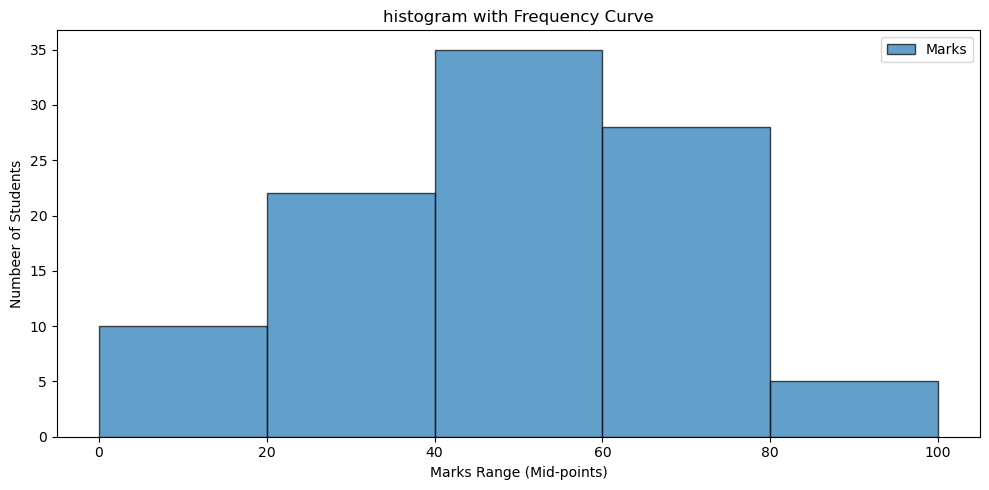

In [13]:
students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students':[10,22,35,28,5]
})
students_data['mid_points'] = students_data['Marks']. apply(lambda m: (int(m.split('-')[0])+ int(m.split('-')[1]))/2)
lower_bound = students_data['Marks'].apply(lambda m: int(m.split('-')[0])). min()
upper_bound = students_data['Marks'].apply(lambda m: int(m.split('-')[1])). max()

bin_edges = list(range(lower_bound, upper_bound+1, 20))
students_data['bins']= pd.cut(x = students_data['no_of_students'], bins= bin_edges)
print (bin_edges)
display(students_data.head())

plt.figure(figsize=(10,5))
# use mid_points as the x-values for the histogram and the frequency y-values
plt.hist(students_data['mid_points'], bins= bin_edges, weights=students_data['no_of_students'],
         edgecolor= 'black', alpha= 0.7, label= 'Marks')

#Add labels and title
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Numbeer of Students')
plt.title('histogram with Frequency Curve')
# Display the legend

plt.legend()
plt.tight_layout()
#Show the plot 
plt.show()

## Frequecy Polygon

,Marks,no_of_students,mid_points
0,0-20,10,10.0
1,20-40,22,30.0
2,40-60,35,50.0
3,60-80,28,70.0
4,80-100,5,90.0


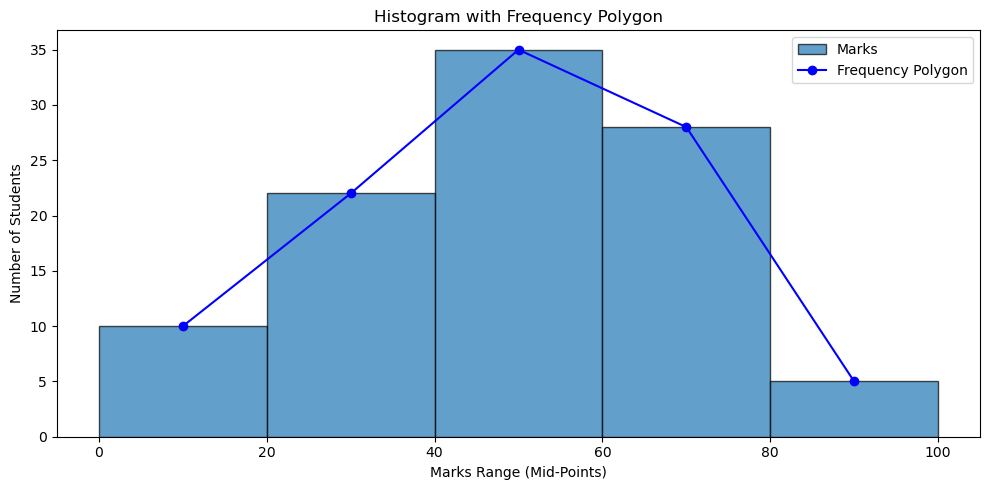

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students': [10, 22, 35, 28, 5]
})

# Calculating mid-points
students_data['mid_points'] = students_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2)

# Defining the bin edges
lower_bound = students_data['Marks'].apply(lambda m: int(m.split('-')[0])).min()
upper_bound = students_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()
bin_edges = list(range(lower_bound, upper_bound + 1, 20))

# Displaying data (optional)
display(students_data.head())

# Plotting histogram
plt.figure(figsize=(10, 5))
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], 
         edgecolor='black', alpha=0.7, label='Marks')

# Plotting frequency polygon
plt.plot(students_data['mid_points'], students_data['no_of_students'], marker='o', color='blue', label='Frequency Polygon')

# Adding labels and title
plt.xlabel('Marks Range (Mid-Points)')
plt.ylabel('Number of Students')
plt.title('Histogram with Frequency Polygon')

# Adding legend and showing plot
plt.legend()
plt.tight_layout()
plt.show()

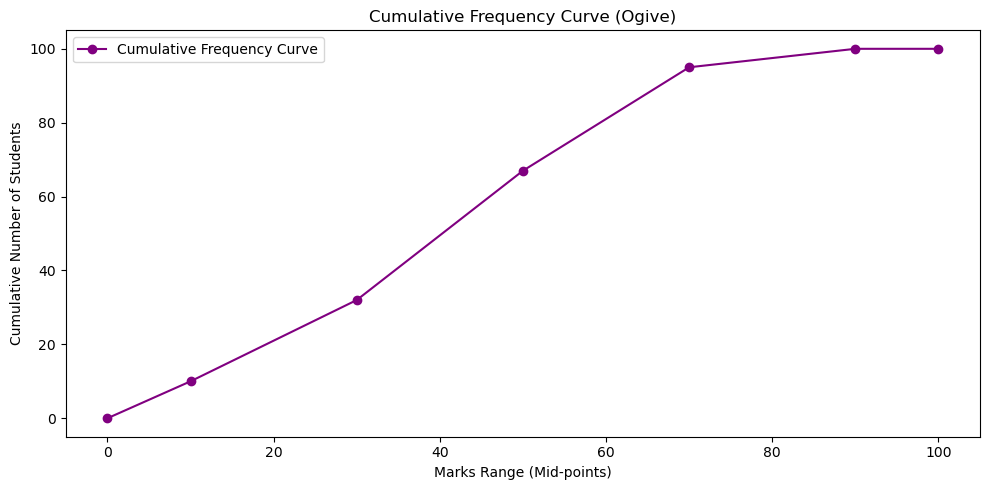

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataframe
students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students': [10, 22, 35, 28, 5]
})

# Calculate mid points
students_data['mid_points'] = students_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2)

# Find the lower and upper bounds
lower_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[0])).min()
upper_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()

# Create bin edges
bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))

# Add an initial (0,0) point to start the cumulative frequency curve from 0
mid_points = [lower_bounds] + list(students_data['mid_points']) + [upper_bounds]
no_of_students = [0] + list(students_data['no_of_students']) + [0]

# Calculate cumulative frequency
cumulative_frequency = [sum(no_of_students[:i+1]) for i in range(len(no_of_students))]

# Plot the cumulative frequency curve (Ogive)
plt.figure(figsize=(10, 5))

# Plot the cumulative frequency curve
plt.plot(mid_points, cumulative_frequency, color='purple', marker='o', linestyle='-', label='Cumulative Frequency Curve')

# Add labels and title
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Cumulative Number of Students')
plt.title('Cumulative Frequency Curve (Ogive)')

# Display the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

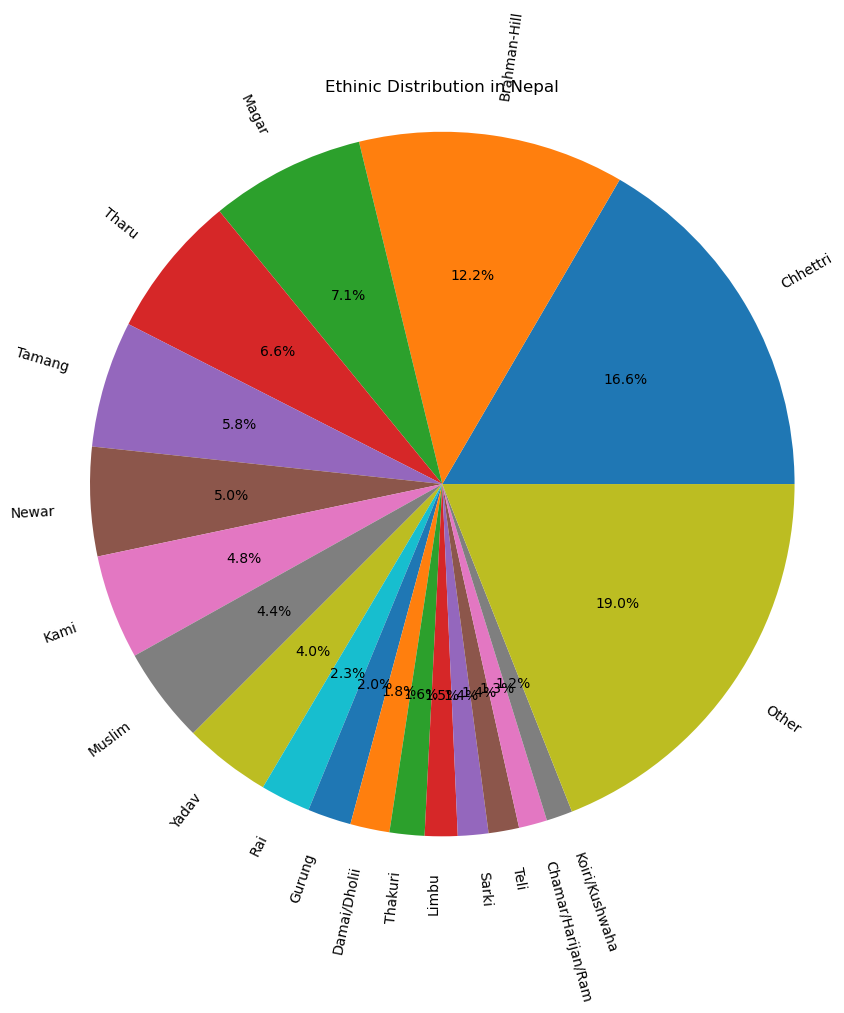

In [12]:
import json
with open ('data/nepal-population-ethinic-group.json','r') as file:
    ethinic_dist=json.load(file)
# Data Preparation
labels= ethinic_dist.keys()
sizes= ethinic_dist.values()
# Create pie Chart
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=0, rotatelabels=45)
plt.title('Ethinic Distribution in Nepal')
plt.axis('equal')
# Display the pie chart
plt.show()

# Introduction to Numpy
NumP stands for Numerical Python, is an open-source Python library that provides support for large, multi-dimensional arrays and matrices.
It also have a collection of high-level mathematical functions to operate on arrays.
# Features of NumPy


In [1]:
import numpy as np

np_array = np.array([2,2,3,4,5,6]) # from list
print(np_array)
np_array_tuple= np.array((1,3,4,5)) # from tuple
print(np_array_tuple)
print(type(np_array))
print(np_array.shape)
print(np_array.dtype)



[2 2 3 4 5 6]
[1 3 4 5]
<class 'numpy.ndarray'>
(6,)
int32


# Create array with deafult values
 
 - Create an array filled with zero np.zeros ((2,2))
 - Create an array filled with ones np.ones((2,2))
 - Creare an array filled with a specific value np.full((2,2),3)

In [2]:
zeros_array = np.zeros((2,2)) # create (n=2, m=2) array filled with zeros
print(zeros_array)
ones_array = np.ones((3,4)) # create (n=3, m=4) array filled with ones
print (ones_array)
fill_array = np.full((2,3),5)
print(fill_array)
print(zeros_array.dtype)

[[0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[5 5 5]
 [5 5 5]]
float64


Creating Arrays with Ranges of Values
* ﻿﻿np. arrange(0,25,5) # [0,5,10, 15, 20] similar to range
* ﻿﻿p. Linespace(0,100, 1000) create evenly spaced values (1000) between start (0)-end(100)

In [3]:
np_arrange = np.arange(0,25,1) #similar to range (0,25)
print(np_arrange)
np_line_space = np.linspace(0,100,11) # create evenly spaced 100 point from 0-100
print(np_line_space)



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [4]:
identical_array = np.eye(3,3) # identity array
print(identical_array)
diagonal_array= np.diag([1,2,3]) # diagonal array(matrix)
print(diagonal_array)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


# Random Array
- np.random.rand([3,3]) create 3 x 3 array with random numbers
- np. random, randint (1, 100, (3, 3)) create 3 x 3 array of random numbers, where numbers are in between 1-100
- np. random. choice([1,2,3,4,5,6, 10], size=(3,3)) create 3 x 3 array of random numbers, where numbers are from given list
- np. random. normal (mu, sigma, 1000) Create random array of elements 100 with mu=population mean and sigma-population standard deviation



In [5]:
import matplotlib.pyplot as plt

random_array = np.random.rand(3,3)
print(random_array)

[[0.60366213 0.69289786 0.62458531]
 [0.96469127 0.20489283 0.72653287]
 [0.9909644  0.11211618 0.91932808]]


In [6]:
import matplotlib.pyplot as plt

random_array = np.random.randint(1, 101, size=(3, 3))
print(random_array)


[[50 28 56]
 [51 28 37]
 [81  8 84]]
